어떤 테스트 포인트에 대해 분류기가 예측한 클래스가 무엇인지 뿐만 아니라 정확한 클래스임을 얼마나 확신하는지가 중요할 때가 많다. 실제 애플리케이션에서는 오류의 종류에 따라 전려 다른 결과를 만든다.

scikit-learn 분료기에서 불확실성을 추정할 수 있는 함수가 두 개 있음. decision_function 과 predit_proba 이다. 대부분의 분류 클래스는 적어도 둘 중 하나를 제공하고 두 함수를 모두 제공하는 경우도 많다. 인위적으로 만든 2차원 데이터셋을 사용해 GeadientBoostingClassifier 분류기의 두 함수 베소드가 어떤 역할을 하는지 보기.

In [2]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer
#한글 폰트사용
from matplotlib import font_manager, rc
font_name =font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=.25, factor=.5, random_state=1)

# 예제를 위해 클래스의 이름을 "blue"와 "red"로 바꿈.(0을 blue로 1을 red로)
y_named = np.array(["blue", "red"])[y]

# 여러 개의 배열을 한꺼번에 trian_test_split에 넣을 수 있다.
# 훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = tts(X,y_named,y,random_state=0)

# 그레이디언트 부스팅 모델을 만든다.
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# 결정 함수

In [12]:
print("X_test.shape:", X_test.shape)
print("결정 함수 결과 형태:", gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


In [14]:
# 결정 함수 결과 중 앞부분 일부를 확인한다.
print("결정 함수: \n", gbrt.decision_function(X_test)[:6])

결정 함수: 
 [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [15]:
print("임계치와 결정 함수 결과 비교:\n", gbrt.decision_function(X_test)>0)
print("예측:\n", gbrt.predict(X_test))

임계치와 결정 함수 결과 비교:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [16]:
# 불리언 값을 0과 1로 변환한다.
greater_zero = (gbrt.decision_function(X_test)>0).astype(int)
# classes_에 인덱스로 사용한다.
pred = gbrt.classes_[greater_zero]
# pred 와 gbrt.predict의 결과를 비교한다.
print("pred는 예측 결과와 같다:", np.all(pred==gbrt.predict(X_test)))

pred는 예측 결과와 같다: True


In [21]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최솟값: {:.2f} 최댓값: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값: -7.69 최댓값: 4.29


C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


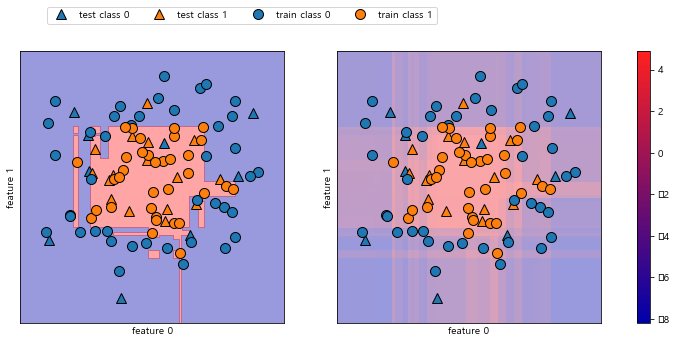

In [23]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
score_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
cbar = plt.colorbar(score_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["test class 0", "test class 1", "train class 0", "train class 1"], ncol=4, loc=(.1, 1.1))

왼쪽 그림은 그레이디언트 부스팅 모델의 결정경계이고 오른쪽 그림은 결정함수의 그림이다.

# 예측 확률

predict_proba의 출력은 각 클래스에 대한 확률이고 decision_function의 출력보다 이해하기 더 쉽다. 이 값의 크기는 이진 분류에서는 항상 (n_samples, 2)이다.

In [24]:
print("확률 값의 형태:", gbrt.predict_proba(X_test).shape)

확률 값의 형태: (25, 2)


각 행의 첫 번째 원소는 첫 번째 클래스의 예측 확률이고 두 번째 원소는 두 번째 클래스의 예측 확률이다. 확률이기 때문에 predict_proba의 출력값은 항상 0과 1 사이의 값이며 두 클래스에 대한 확률의 합은 항상 1이다.

In [25]:
print("예측 확률:\n", gbrt.predict_proba(X_test))

예측 확률:
 [[1.57362600e-02 9.84263740e-01]
 [8.45756491e-01 1.54243509e-01]
 [9.81128693e-01 1.88713075e-02]
 [9.74067751e-01 2.59322495e-02]
 [1.35214179e-02 9.86478582e-01]
 [2.50463685e-02 9.74953631e-01]
 [9.99543275e-01 4.56725227e-04]
 [1.61426459e-02 9.83857354e-01]
 [2.48330011e-01 7.51669989e-01]
 [3.20518856e-02 9.67948114e-01]
 [9.98441742e-01 1.55825797e-03]
 [1.35214179e-02 9.86478582e-01]
 [1.98099196e-02 9.80190080e-01]
 [7.68580268e-01 2.31419732e-01]
 [2.50463685e-02 9.74953631e-01]
 [9.84817488e-01 1.51825121e-02]
 [7.73836115e-01 2.26163885e-01]
 [9.80463918e-01 1.95360817e-02]
 [1.73607853e-02 9.82639215e-01]
 [1.61426459e-02 9.83857354e-01]
 [1.61426459e-02 9.83857354e-01]
 [3.41393690e-01 6.58606310e-01]
 [6.30759354e-02 9.36924065e-01]
 [9.34424780e-01 6.55752202e-02]
 [8.66199569e-01 1.33800431e-01]]


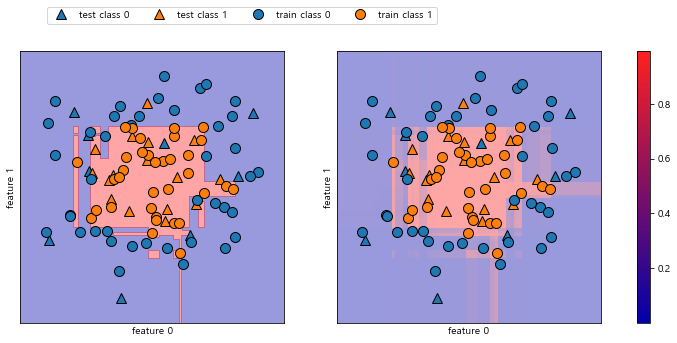

In [26]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
score_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
cbar = plt.colorbar(score_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["test class 0", "test class 1", "train class 0", "train class 1"], ncol=4, loc=(.1, 1.1))

# 다중 분류에서의 불확실성

decision_function과 predict_proba 메서드는 다중 분류에도 사용할 수 있다. 클래스가 세 개인 iris 데이터셋에 적용해보기.

In [27]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = tts(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [28]:
print("결정 함수의 결과 형태:", gbrt.decision_function(X_test).shape)
# decision function 결과 중 앞부분 일부를 확인합니다.
print("결정 함수 결과:\n", gbrt.decision_function(X_test)[:6,:])

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
 [[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


In [29]:
print("가장 큰 결정 함수의 인덱스:\n", np.argmax(gbrt.decision_function(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [31]:
print("가장 큰 예측 확률의 인덱스:\n", np.argmax(gbrt.predict_proba(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 예측 확률의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# iris 데이터셋의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류:", logreg.classes_)
print("예측:", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정 함수의 인덱스:", argmax_dec_func[:10])
print("인덱스를 classes_에 연결:", logreg.classes_[argmax_dec_func][:10])

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classes_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
